# Mileage Prediction

-------------

## **Objective**

## For milage prediction using dataset

## **Data Source**

## From ybi foundation github dataset

## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [3]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/MPG.csv')

## **Describe Data**

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## **Data Visualization**

<Axes: xlabel='displacement', ylabel='mpg'>

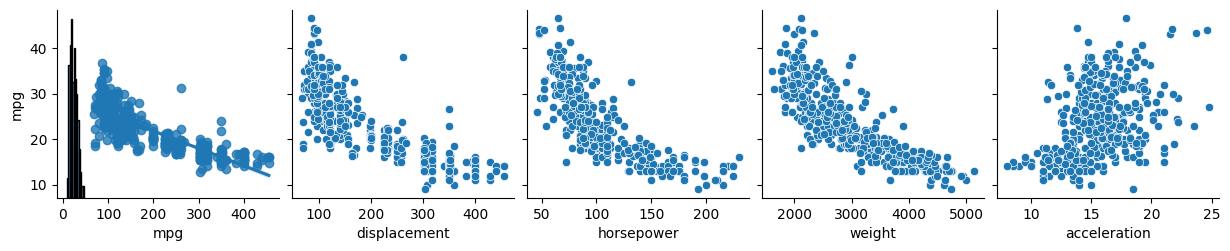

In [6]:
sns.pairplot(df, x_vars = ['mpg', 'displacement', 'horsepower', 'weight','acceleration'] , y_vars=['mpg'])


sns.regplot(x='displacement' , y='mpg', data = df)


## **Data Preprocessing**

In [7]:

df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [9]:

y=df['mpg']


In [10]:
x=df[['displacement', 'horsepower', 'weight','acceleration']]

In [11]:

from sklearn.preprocessing import StandardScaler

In [13]:
ss= StandardScaler()


x = ss.fit_transform(x)


x


array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [14]:

pd.DataFrame(x).describe()

,0,1,2,3
count,392.000000,3.920000e+02,3.920000e+02,3.920000e+02
mean,0.000000,1.812609e-17,-1.812609e-17,-1.812609e-17
std,1.001278,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-0.855532,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-0.415384,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,0.778276,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416,3.265452e+00,2.549061e+00,3.360262e+00


In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## **Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7 , random_state=2529)


x_train.shape, x_test.shape, y_train.shape, y_test.shape


((274, 4), (118, 4), (274,), (118,))

## **Modeling**

In [17]:
from sklearn.linear_model import LinearRegression


lr=LinearRegression()


lr.fit(x_train,y_train)

LinearRegression()

## **Model Evaluation**

In [18]:
lr.intercept_



lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

## **Prediction**

In [19]:

y_pred=lr.predict(x_test)


y_pred


array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

In [20]:


from sklearn.preprocessing import PolynomialFeatures


poly=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)


X_train2 = poly.fit_transform(x_train)


X_test2 = poly.fit_transform(x_test)


lr.fit(X_train2,y_train)

LinearRegression()

In [21]:
lr.intercept_


lr.coef_


y_pred_poly = lr.predict(X_test2)


In [22]:

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


mean_absolute_error(y_test,y_pred_poly)

2.7887147720295973

In [23]:

mean_absolute_percentage_error(y_test,y_pred_poly)

0.1207401834293869

In [24]:
r2_score(y_test,y_pred_poly)


0.7461731314563802

## **Explaination**

To create a model for predicting mileage (measured as miles per gallon, mpg) based on the provided dataset, we need to follow a series of steps that include data preprocessing, model training, and evaluation. Here's a step-by-step guide:

Steps to Create a Mileage Prediction Model

1. Load the Data

2. Data Preprocessing

3. Handle missing values

4. Convert categorical variables

5. Feature scaling

6. Split the Data

7. Train a Machine Learning Model

8. Evaluate the Model

9. Make Predictions